<p><font size=18>Lesson 01: Linear Programming and Pyomo</font></p>

In [17]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

# Introduction and Set-Up

## Introduction to CoCalc (video)

The video below demonstrates how we will use CoCalc in this class.  If you got this notebook without signing up for CoCalc (possible through github) then visit Canvas to find and follow the "CoCalc and Jupyter Instructions" handout before viewing the video.  Even if you setup your own Jupyter environment at home, you'll still need to submit your assignments via CoCalc.

In [18]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_cocalc-walkthrough/",
    width=640,
    height=360)

## Configure Notebook Extensions (video)

Whether you're using Jupyter at home or in CoCalc, enable these notebook extensions to view and use the class notebooks in the intended manner (table of contents, code folding,  etc.).

In [19]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_nb-extensions/index.html",
    width=640,
    height=360)

# What is a Linear Program?

**Before progressing through the remainder of this notebook, you really should have read Chapter 3 so that you know the basics of a linear program.**

## <font color = "blue"> Self Assessment: LP Assumptions </font>

Read Hillier 3.3 and answer the questions below.  Solutions are found in the **Self_Assessment_Solutions** notebook.

For parts (a) - (c) below, state which, if any, linear programming model assumptions are violated and why.

(a) Maximize $Z = 2x_1 + 7x_2 + x_1 x_2,$ 

subject to 

$
\begin{array}{rcrcr}
5 x_1 & + &  3 x_2 & \leq & 30 \\
 x_1 & + &  3 x_2 & \leq & 40 \\
12 x_1 & + & x^2_2 & \leq & 50
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$

(b) Minimize $Z = x_1 + 2x_2 + 3,$ 

subject to 

$
\begin{array}{rcrcr}
 & + &  5 x_2 & \geq & 8 \\
 x_1 & + &  & \geq & 4 \\
 x_1 & + & x_2 & \geq & 10
\end{array}
$

and $x_1 = 1,2,3, \ldots, x_2 = 1,2,3, \ldots$

(c)  Maximize $Z = 0.5 x + 0.3 y$

subject to 

$
\begin{array}{rcrcr}
2x & - & 0.1 y & \leq & 2.5 \\
0.25 x & + & 1 & \leq & 5.5 \\
 3 x & + & a_2 y & \leq & 7.9
\end{array}
$

$x \geq 0, y \geq 0,$ 

$2 \leq a_2 \leq 3$

# Graphical Solutions

## Paper Example (video)

Get "old school" and solve a graphical example with paper and pencil along with some graphing and algebra.  This video talks you through an example.  Doing this yourself will help your understanding (and appreciation) of how optimal solutions are found graphically using various software applications. 

In [9]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-graphical-by-hand/index.html",
    width=640,
    height=360)

### <font color = "blue"> Self Assessment: Paper and Pencil Method </font>

**Textbook Problem 3.1-6.** Use paper and pencil to solve this problem using the graphical method.

Maximize $Z = 10x_1 + 20x_2,$ 

subject to 

$
\begin{array}{rcrcr}
-x_1 & + & 2x_2 & \leq & 15 \\
 x_1 & + &  x_2 & \leq & 12 \\
5x_1 & + & 3x_2 & \leq & 45
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$

## Using Software for Graphical Solutions

We present two tools below, they are: 

* <a href = http://www.phpsimplex.com/en> PHPSimplex </a> is a virtual "paper and pencil" graphical solver.  
* <a href = https://www.desmos.com> Desmos </a> is an interactive graphing tool that can be used to solve linear programs and much more.

### PHPSimplex Example (video)

<a href="http://www.phpsimplex.com/en">PHPSimplex </a> is a site dedicated to learning linear programming.   We'll utilize their implementation of the graphical method. 

In [2]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-graphical-method-phpsimplex/index.html",
    width=640,
    height=360)

### Desmos Example (video)

<a href="https://www.desmos.com/">Desmos</a> is a step up from "paper and pencil", but is still pretty hands-on.  It's a nice place to work with graphical solutions to LP problems where you still have a lot of control over the objective function and constraints.  

In [3]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-graphical-example-desmos/index.html",
    width=640,
    height=360)

### <font color="blue">Self Assessment:  Graphical Method #1 </font>

**Textbook Problem 3.1-9.** The Primo Insurance Company is introducing two new product lines: special risk insurance and mortgages. The expected profit is \\$5 per unit on special risk insurance and \\$2 per unit on mortgages.  Management wishes to establish sales quotas for the new product lines to maximize total expected profit. The work requirements are as follows:

<img src="images/screen-problem2.png" width="440" height="250">

(a) Formulate a linear programming model for this problem.

(b) Use DESMOS (at www.desmos.com) to solve this model using the graphical method. Paste screen shots of your solution into your homework file.

(c) Verify the exact value of your optimal solution from  (b)
  by solving algebraically for the simultaneous solution of the
  relevant two equations

### <font color="blue">Self Assessment: Graphical Method #2 </font>

**Textbook Problem 3.2-3.** This is your lucky day. You have just won a \\$20,000
  prize. You are setting aside \\$8,000 for taxes and partying
  expenses, but you have decided to invest the other \\$12,000. Upon
  hearing this news, two different friends have offered you an
  opportunity to become a partner in two different entrepreneurial
  ventures, one planned by each friend. In both cases, this investment
  would involve expending some of your time next summer as well as
  putting up cash. Becoming a full partner in the first friend’s
  venture would require an investment of \\$10,000 and 400 hours, and
  your estimated profit (ignoring the value of your time) would be
  \\$9,000. The corresponding figures for the second friend’s venture
  are \\$8,000 and 500 hours, with an estimated profit to you of
  \\$9,000. However, both friends are flexible and would allow you to
  come in at any fraction of a full partnership you would like. If you
  choose a fraction of a full partnership, all the above figures given
  for a full partnership (money investment, time investment, and your
  profit) would be multiplied by this same fraction.  Because you were
  looking for an interesting summer job anyway (maximum of 600 hours),
  you have decided to participate in one or both friends’ ventures in
  whichever combination would maximize your total estimated
  profit. You now need to solve the problem of finding the best
  combination.
  
(a) Describe the analogy between this problem and
  the Wyndor Glass Co. problem discussed in Sec. 3.1. Then construct
  and fill in a table like Table 3.1 for this problem, identifying
  both the activities and the resources.  

(b) Formulate a linear
  programming model for this problem.  

(c) Use PHPSimplex (at www.phpsimplex.com/en) to solve this model by the graphical
  method. Paste screen shots of your solution into your homework file.  What are the values of the decision variables at the optimal solution?  What is the total estimated profit?  

### <font color="blue">Self Assessment: Graphical Method #3 </font>

**Textbook Problem 3.2-4.** Use the graphical method to find all optimal soutions for the
following model:  

Maximize $Z = 500x_1 + 300x_2,$ 

subject to 

$
\begin{array}{rcrcr}
15 x_1 & + &  5 x_2 & \leq & 300 \\
10 x_1 & + &   6 x_2 & \leq & 240 \\
8x_1 & + & 12x_2 & \leq & 450
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$

## Graphical Widget for Exploring Wyndor Problem

Here is the Wyndor model.  $Z$ is the profit in thousands of dollars.  $x_1$ and $x_2$ are the batches of doors and windows, respectively.  The constraints, in order, represent the production capacities of Plants 1, 2, and 3.

Maximize $Z = 3 x_1 + 5 x_2$

Subject to:

$
\begin{array}{ccccc}
 x_1 &   &      & \leq & 4 \\
     &   & 2x_2 & \leq & 12 \\
3x_1 & + & 2x_2 & \leq & 18
\end{array}
$

$x_1 \geq 0$, $x_2 \geq 0$

Use the widget below to explore the Wyndor model. 

* Slide profScl (Profit Scale).  Do you see why the maximum value of profit occurs at a corner point?
* Change the objective function coefficients, $c1$ and $c2$.  Can you get the location of maximum to change?  Can you get it be an entire edge of the feasible region (infinitely many solutions)?
* $b1, b2, b3$ are the values of the right hand sides of the constraints.  How does changing those values effect the feasible region and the maximum profit?

In [10]:
# Run this to see widget, it isn't important to understand the code
%matplotlib notebook
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
from pyomo.environ import *

def WyndorInteractiveGraph( coefSlider = False, constraintSlider = False):

    # create model instance
    model = ConcreteModel( name = "Wyndor" )

    # decision variables
    model.doors = Var( domain = NonNegativeReals )
    model.windows = Var( domain = NonNegativeReals )

    # objective function
    model.c1 = Param(default=3,mutable=True)
    model.c2 = Param(default=5,mutable=True)
    model.profit = Objective(expr = model.c1 * model.doors + 
                             model.c2 * model.windows, sense = maximize )

    # constraints
    model.b1 = Param(default=4,mutable=True)
    model.b2 = Param(default=12,mutable=True)
    model.b3 = Param(default=18,mutable=True)
    model.ct_plant1 = Constraint( expr = model.doors <= model.b1 )
    model.ct_plant2 = Constraint( expr = 2*model.windows <= model.b2 )
    model.ct_plant3 = Constraint( expr = 3*model.doors + 2*model.windows <= model.b3 )

    # solver
    solver = SolverFactory('glpk')

    # use seaborn to change the default graphics to something nicer
    # and set a nice color palette
    import seaborn as sns
    sns.set_palette('Set1')

    # create the plot object
    fig, ax = plt.subplots(figsize=(5,5))
    d = np.linspace(0, 12)

    # plant 1 capacity
    plant1_line, = plt.plot(4 * np.ones_like(d), d, lw=3, label='Plant 1',color='b')
    plant1_fill = plt.fill_betweenx(d, 0, 4, alpha=0.1,color='b')

    # plant 2 capacity
    plant2_line, = plt.plot(d, 12/2*np.ones_like(d), lw=3, label='Plant 2',color='r')
    plant2_fill = plt.fill_between(d, 0, 6, alpha=0.1,color='r')

    # plant 3 capacity
    plant3_line, = plt.plot(d, (18-3*d)/2, lw=3, label='Plant 3',color='g')
    plant3_fill = plt.fill_between(d, 0, (18-3*d)/2, alpha=0.1,color='g')

    # add non-negativity constraints
    plt.plot(np.zeros_like(d), d, lw=3, label='d non-negative',color='c')
    plt.plot(d, np.zeros_like(d), lw=3, label='w non-negative',color='m')


    # level curve for profit P
    profit_line, = plt.plot(d, (36-3*d)/5, 'k--', lw = 3, label = 'profit')

    # labels and stuff
    plt.xlabel('doors', fontsize=16)
    plt.ylabel('windows', fontsize=16)
    plt.xlim(-0.05, 12)
    plt.ylim(-0.05, 12)
    plt.legend(loc = 'upper right',fontsize=12)

    # additional elements
    # pt, = plt.plot(20, 60, 'k.', markersize = 20 )
    # txt = plt.text( 81, 67.5, '= 180', fontsize = 14, zorder=10)
    txt = plt.text( 6.2, 6.4, 'Profit = 18', fontsize = 12)
    # txt2 = plt.text( 7, 6.6, 'Max Prof. = 36',fontsize = 12)

    plt.show()
    
    plim = (.5,1.5,.05)
    c1lim = (0,8,.5)
    c1fix = fixed(3)
    c2lim = (0,8,.5)
    c2fix = fixed(5)
    b1lim = (1,7)
    b1fix = fixed(4)
    b2lim = (6,18)
    b2fix = fixed(12)
    b3lim = (12,24)
    b3fix = fixed(18)

    def update( profScl = .5, c1 = 3, c2 = 5, b1 = 4, b2 = 12, b3 = 18):
        model.c1 = c1
        model.c2 = c2
        model.b1 = b1
        model.b2 = b2
        model.b3 = b3
        solver.solve(model)
        mxprofit = model.profit()
        profit = mxprofit*profScl
 
        profit_line.set_ydata((profit-c1*d)/(c2+.0001)) # hack to avoid div by 0
        
        ax.collections.clear()

        plant1_line.set_xdata(b1 * np.ones_like(d))
        plt.fill_betweenx(d, 0, b1, alpha=0.1,color='b')
        
        plant2_line.set_ydata(b2/2 * np.ones_like(d))
        plt.fill_between(d, 0, b2/2, alpha=0.1,color='r')
        
        plant3_line.set_ydata((b3-3*d)/2)
        plt.fill_between(d, 0, (b3-3*d)/2, alpha=0.1,color='g')    

        txt.set_text('Profit = {:3.2f}'.format(profit) )
        # txt2.set_text('Max Prof. = {:3.2f}'.format(mxprofit) )
        fig.canvas.draw()
    
    if (coefSlider and constraintSlider):
        interact(update,profScl=plim,c1=c1lim,c2=c2lim,b1=b1lim,b2=b2lim,b3=b3lim);
    elif (coefSlider and not constraintSlider):
        interact(update,profScl=plim,c1=c1lim,c2=c2lim,b1=b1fix,b2=b2fix,b3=b3fix);
    elif (not coefSlider and constraintSlider):
        interact(update,profScl=plim,c1=c1fix,c2=c2fix,b1=b1lim,b2=b2lim,b3=b3lim);
    else: 
        interact(update,profScl=plim,c1=c1fix,c2=c2fix,b1=b1fix,b2=b2fix,b3=b3fix);
                 
WyndorInteractiveGraph(True,True)

ModuleNotFoundError: No module named 'pyomo'

## Wyndor Minimize Cost Widget

Let's modify the Wyndor problem to minimize the cost of producing doors and windows.

$Z$ now represents the cost in thousands of dollars.  $x_1$ and $x_2$ are the batches of doors and windows, respectively.  If we include only the original constraints, then the minimum cost occurs when $x_1 = 0$ and $x_2 = 0$, that is we produce nothing.  However, the Wyndor Company also wants to produce a total of at least 3 batches of doors and/or windows to keep the plants running. 

The constraints below, in order, represent the production capacities of Plants 1, 2, and 3, as well as the minimum production constraint.  

Minimize $Z = 2 x_1 + 3 x_2$

Subject to:

$
\begin{array}{ccccc}
 x_1 &   &      & \leq & 4 \\
     &   & 2x_2 & \leq & 12 \\
3x_1 & + & 2x_2 & \leq & 18 \\
 x_1 & + &  x_2 & \geq & 3 
\end{array}
$

Use the widget below to explore the Wyndor cost minimization model. 

* Where does the minimum cost occur?
* If b4 is 0 so that the minimum number produced is zero, then what is the minimum cost?
* What is the maximum cost?  Where does it occur?

In [ ]:
# Run this to see widget, it isn't important to understand the code
%matplotlib notebook
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
from pyomo.environ import *

def WyndorInteractiveGraph2( coefSlider = False, constraintSlider = False):

    # create model instance
    model = ConcreteModel( name = "Wyndor" )

    # decision variables
    model.doors = Var( domain = NonNegativeReals )
    model.windows = Var( domain = NonNegativeReals )

    # objective function
    model.c1 = Param(default=2,mutable=True)
    model.c2 = Param(default=3,mutable=True)
    model.cost = Objective(expr = model.c1 * model.doors + 
                             model.c2 * model.windows, sense = minimize)

    # constraints
    model.b1 = Param(default=4,mutable=True)
    model.b2 = Param(default=12,mutable=True)
    model.b3 = Param(default=18,mutable=True)
    model.b4 = Param(default=3,mutable=True)
    model.ct_plant1 = Constraint( expr = model.doors <= model.b1 )
    model.ct_plant2 = Constraint( expr = 2*model.windows <= model.b2 )
    model.ct_plant3 = Constraint( expr = 3*model.doors + 2*model.windows <= model.b3 )
    model.ct_minprod = Constraint( expr = model.doors + model.windows >= model.b4 )

    # solver
    solver = SolverFactory('glpk')

    # use seaborn to change the default graphics to something nicer
    # and set a nice color palette
    import seaborn as sns
    sns.set_palette('Set1')

    # create the plot object
    fig, ax = plt.subplots(figsize=(5,5))
    d = np.linspace(0, 12)

    # plant 1 capacity
    plant1_line, = plt.plot(4 * np.ones_like(d), d, lw=3, label='Plant 1',color='b')
    plant1_fill = plt.fill_betweenx(d, 0, 4, alpha=0.1,color='b')

    # plant 2 capacity
    plant2_line, = plt.plot(d, 12/2*np.ones_like(d), lw=3, label='Plant 2',color='r')
    plant2_fill = plt.fill_between(d, 0, 6, alpha=0.1,color='r')

    # plant 3 capacity
    plant3_line, = plt.plot(d, (18-3*d)/2, lw=3, label='Plant 3',color='g')
    plant3_fill = plt.fill_between(d, 0, (18-3*d)/2, alpha=0.1,color='g')
    
    # min production
    minprod_line, = plt.plot(d, 3 - d, lw=3, label = 'Min Prod', color='y')
    minprod_fill = plt.fill_between(d, 3-d, 12, alpha=0.1, color='y')

    # add non-negativity constraints
    plt.plot(np.zeros_like(d), d, lw=3, label='d non-negative',color='c')
    plt.plot(d, np.zeros_like(d), lw=3, label='w non-negative',color='m')


    # level curve for profit P
    cost_line, = plt.plot(d, (13.5-2*d)/3, 'k--', lw = 3, label = 'cost')

    # labels and stuff
    plt.xlabel('doors', fontsize=16)
    plt.ylabel('windows', fontsize=16)
    plt.xlim(-0.05, 12)
    plt.ylim(-0.05, 12)
    plt.legend(loc = 'upper right',fontsize=12)

    # additional elements
    # pt, = plt.plot(20, 60, 'k.', markersize = 20 )
    # txt = plt.text( 81, 67.5, '= 180', fontsize = 14, zorder=10)
    txt = plt.text( 6.2, 5.4, 'Cost = 999', fontsize = 12)
    # txt2 = plt.text( 7, 6.6, 'Max Prof. = 36',fontsize = 12)

    plt.show()
    
    clim = (.05,1.95,.05)
    c1lim = (0,8,.5)
    c1fix = fixed(2)
    c2lim = (0,8,.5)
    c2fix = fixed(3)
    b1lim = (1,7)
    b1fix = fixed(4)
    b2lim = (6,18)
    b2fix = fixed(12)
    b3lim = (12,24)
    b3fix = fixed(18)
    b4lim = (0,4)
    b4fix = fixed(3)

    def update( costScl = 1.95, c1 = 2, c2 = 3, b1 = 4, b2 = 12, b3 = 18, b4 = 3):
        model.c1 = c1
        model.c2 = c2
        model.b1 = b1
        model.b2 = b2
        model.b3 = b3
        model.b4 = b4
        solver.solve(model)
        mncost = model.cost()
        cost = mncost*costScl
 
        cost_line.set_ydata((cost-c1*d)/(c2+.0001)) # hack to avoid div by 0
        
        ax.collections.clear()

        plant1_line.set_xdata(b1 * np.ones_like(d))
        plt.fill_betweenx(d, 0, b1, alpha=0.1,color='b')
        
        plant2_line.set_ydata(b2/2 * np.ones_like(d))
        plt.fill_between(d, 0, b2/2, alpha=0.1,color='r')
        
        plant3_line.set_ydata((b3-3*d)/2)
        plt.fill_between(d, 0, (b3-3*d)/2, alpha=0.1,color='g')  
        
        minprod_line.set_ydata(b4-d)
        plt.fill_between(d,b4-d,12,alpha=0.1,color='y')

        txt.set_text('Cost = {:3.2f}'.format(cost) )
        fig.canvas.draw()
    
    if (coefSlider and constraintSlider):
        interact(update,costScl=clim,c1=c1lim,c2=c2lim,b1=b1lim,b2=b2lim,b3=b3lim,b4=b4lim);
    elif (coefSlider and not constraintSlider):
        interact(update,costScl=clim,c1=c1lim,c2=c2lim,b1=b1fix,b2=b2fix,b3=b3fix,b4=b4fix);
    elif (not coefSlider and constraintSlider):
        interact(update,costScl=clim,c1=c1fix,c2=c2fix,b1=b1lim,b2=b2lim,b3=b3lim,b4=b4lim);
    else: 
        interact(update,costScl=clim,c1=c1fix,c2=c2fix,b1=b1fix,b2=b2fix,b3=b3fix,b4=b4fix);
                 
WyndorInteractiveGraph2(True,True)

### <font color="blue"> Self Assessment:  Graphical Method #4 

**Textbook Problem 3.4-4.** Use the graphical method to solve the problem:  

Minimize $Z = 15x_1 + 20x_2,$ 

subject to 

$
\begin{array}{rcrcr}
x_1 & + & 2x_2 & \geq & 10 \\
2 x_1 & - &  3x_2 & \leq & 6 \\
x_1 & + & x_2 & \geq & 6
\end{array}
$

and $x_1 \geq 0, x_2 \geq 0.$ 

## Unbounded Regions

### Widget
Play with the widget to see how a maximization (or minimization) linear program may or may not have a maximum value on an unbounded region.  It depends on the objective function.

In the problem below there is no upper bound on $x$ so the feasible region is a strip that extends to infinity in the horizontal direction.

Try and answer some questions on your own and then watch the video that follows if you want more guidance.

* Without changing any other sliders play with zMult.  Is there a minimum value?  Is there a maximum value?
* Now change the coefficients c1 and c2 ($ Z = c_1 x + c_2 y $).  Can you find an objective function that has maximum value but no minimum value?
* Find coefficients c1 and c2 so that there are infinitely many solutions.


<IPython.core.display.Javascript object>


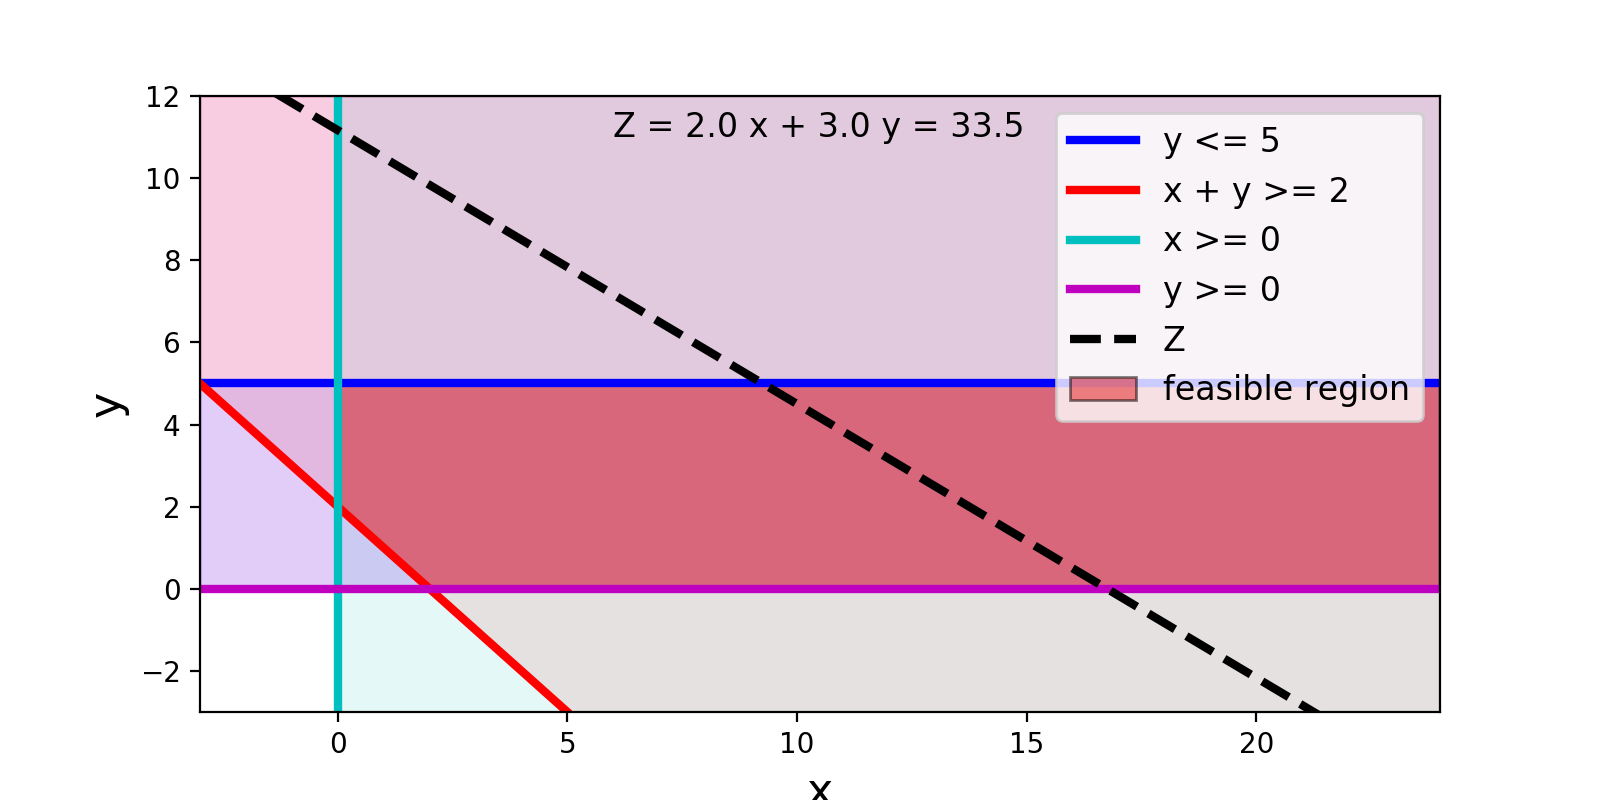

A Jupyter Widget

In [3]:
# Run this to see widget, it isn't important to understand the code
%matplotlib notebook
from ipywidgets import *
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch
import numpy as np
def MaxMinInteractiveGraph( coefSlider = True, coefx = 2, coefy = 3 ):

    # use -3 <= coefx <= 3, -3 <= coefy <= 3, there is no error catching
    
    import seaborn as sns
    sns.set_palette('Set1')

    # create the plot object
    fig, ax = plt.subplots(figsize=(8,4))
    x = np.linspace(-3, 24)

    # constraint 1
    ct1_line, = plt.plot(x, 0*x + 5, lw=3, label='y <= 5',color='b')
    ct1_fill = plt.fill_between(x, 0, 5, alpha=0.1,color='b')

    # constraint 2
    ct2_line, = plt.plot(x, 2-x, lw=3, label='x + y >= 2',color='r')
    ct2_fill = plt.fill_between(x, 2-x, 12, alpha=0.1,color='r')

    # add non-negativity constraints
    plt.plot(np.zeros_like(x), x, lw=3, label='x >= 0',color='c')
    plt.fill_betweenx(x,0,24,alpha=0.1,color='c')
    plt.plot(x, np.zeros_like(x), lw=3, label='y >= 0',color='m')
    plt.fill_between(x,0,12,alpha=0.1,color='m')

    # highlight the feasible region
    path = Path([(2,0),(24,0),(24,5),(0,5),(0,2),(2,0)])
    patch = PathPatch(path, label='feasible region', alpha=0.5)
    ax.add_patch(patch)

    # level curve for profit P
    obj_line, = plt.plot(x, (20-coefx*x)/coefy, 'k--', lw = 3, label = 'Z')

    # labels and stuff
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(-3, 24)
    plt.ylim(-3, 12)
    plt.legend(loc = 'upper right',fontsize=12)

    # additional elements
    txt = plt.text( 6, 11, 'Z = 20', fontsize = 12)

    plt.show()
    
    zlim = (-.4,1.5,.05)
    c1lim = (-3,3,.5)
    c1fix = fixed(coefx)
    c2lim = (-3,3,.5)
    c2fix = fixed(coefy)

    def update( zMult = .5, c1 = coefx, c2 = coefy  ):
        
        xcps = np.array([2,24,24,0,0])
        ycps = np.array([0, 0, 5,5,2])
        zcps = c1*xcps + c2*ycps
        zmin = np.min(zcps)
        zmax = np.max(zcps)
        z = ((1-zMult)*zmin + zMult*zmax)
 
        if (c1 == 0 and c2 == 0):
            obj_line.set_ydata(0*x -4)
        else:
            obj_line.set_ydata((z-c1*x)/(c2+.0001)) # hack to avoid div by 0
            

        #txt.set_text('Z = {:3.2f}'.format(z) )
        if (c2 >= 0):
            txt.set_text('Z = {:2.1f} x + '.format(c1) + '{:2.1f} y '.format(c2) + '= {:3.1f}'.format(z) )
        else:
            txt.set_text('Z = {:2.1f} x - '.format(c1) + '{:2.1f} y '.format(-c2) + '= {:3.1f}'.format(z) )
        fig.canvas.draw()
    
    if (coefSlider):
        interact(update,zMult=zlim,c1=c1lim,c2=c2lim);
    else: 
        interact(update,zMult=zlim,c1=c1fix,c2=c2fix);
                 
MaxMinInteractiveGraph(True)

### Video

In [3]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-unbounded-feasible-region/index.html",
    width=640,
    height=360)

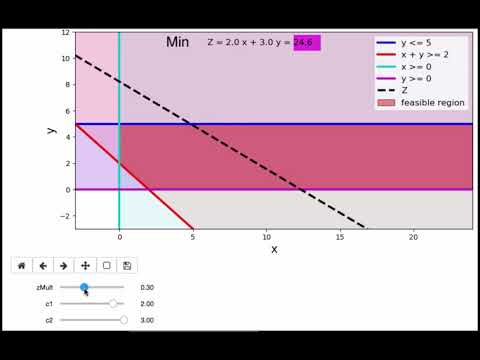

In [5]:
# Hidden code to display YouTube video
from IPython.display import YouTubeVideo
YouTubeVideo('gWcy2fYwtfo', width=640, height=480)

# Solving Linear Programs with Pyomo

## What is Pyomo?

* A Python framework for formulating optimization models
* Similar to other mathematical programming languages such as AMPL and LINDO
* Uses natural math syntax for models (we'll get into examples below)
* Allows separation of the model from the data to formulate large models concisely
* Works with many solvers including GLPK, CPLEX, Gurobi, etc.

Pyomo is an example of a declarative programming language.  Instead of specifying exactly how to get the solution (imperative programming) we *declare* the problem mathematically.  Pyomo then translates the mathematical problem into a computer problem that can be solved by one of many avaialable solvers.

## Pyomo Resources

Some resources to help you learn more about Pyomo:
    
* <a href="https://pyomo.readthedocs.io/en/stable/"> The Official Pyomo Documentation. </a> 
* The <a href="https://www.osti.gov/servlets/purl/1376827"> Pyomo Tutorial </a> is a large set of slides from the Pyomo developers at Sandia National Labs
* Professor Jeffrey Cantor's <a href="https://jckantor.github.io/ND-Pyomo-Cookbook/"> ND Pyomo Cookbook </a> gives many examples
* <a href = "https://github.com/Pyomo/PyomoGallery"> The Pyomo Gallery </a> also has several examples.

## Installing Pyomo and GLPK

If you're working in CoCalc these are already installed.  If you want to install them at home we suggest using the Anocanda distribution, then in a terminal window:

install Pyomo with:
```conda install -c conda-forge pyomo```

install GLPK with:
```conda install -c conda-forge glpk```

## Two kinds of Pyomo models

**Concrete Models:** data first, then model
<img src="images/concrete_model.png" width="220">
* 1-pass construction: numerical constants supplied as model is built
* easier to script
* harder to reuse model

**Abstract Models:** model first, then data
<img src="images/abstract_model.png" width="320">
* 2-pass construction
* Pass 1: Model is constructed with unknown numerical constants
* Pass 2: Numerical constants added from separate file at runtime
* harder to script
* easier for large problems and model reuse

We'll stick to concrete models in this course, but we'll take steps toward making them abstract by separating the data and the model 

## Pyomo Example

### Wyndor Glass Company

Here is the Wyndor model as described in the textbook.  $Z$ is the profit in thousands of dollars.  $d$ and $w$ are the batches of doors and windows, respectively.  The constraints, in order, represent the production capacities of Plants 1, 2, and 3.

Maximize $Z = 3 d + 5 w$

Subject to:

$
\begin{array}{ccccc}
 d &   &    & \leq & 4 \\
   &   & 2w & \leq & 12 \\
3d & + & 2w & \leq & 18
\end{array}
$

$d \geq 0$, $w \geq 0$

### First Pyomo Solution

#### Video: Code Walkthrough

In [4]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-wyndor1/index.html",
    width=640,
    height=360)

#### Pyomo Solution

In [11]:
# Unfold to see the Pyomo solution with individual decision variables
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="Wyndor")

# Decision Variables
model.doors = Var(domain=Reals)
model.windows = Var(domain=Reals)

# Objective
model.profit = Objective(expr=3.0 * model.doors + 5.0 * model.windows,
                         sense=maximize)

# Constraints
model.Plant1 = Constraint(expr=model.doors <= 4)
model.Plant2 = Constraint(expr=2.0 * model.windows <= 12)
model.Plant3 = Constraint(expr=3.0 * model.doors + 2.0 * model.windows <= 18)
model.dgeq0 = Constraint(expr=model.doors >= 0)
model.wgeq0 = Constraint(expr=model.windows >= 0)

# Solve
solver = SolverFactory('glpk')
solver.solve(model)

#display(model)

# display solution
import babel.numbers as numbers  # needed to display as currency
print("Maximum Profit = ",
      numbers.format_currency(1000 * model.profit(), 'USD', locale='en_US'))
print("Batches of Doors = {}".format(model.doors()))
print("Batches of Windows = {}".format(model.windows()))

ModuleNotFoundError: No module named 'pyomo'

#### <font color="blue"> Self-Assessment: Specifying Bounds </font>

Non-negativity constraints like $d\geq0$ can be included in the variable declarations by changing ```domain=Reals``` to ```domain=NonNegativeReals```.  

We can also include lower and upper bounds in the variable declarations like this: ```model.doors = Var(domain=Reals, bounds = (0,4) )```.  

*Try this:*  Copy the Pyomo Wyndor solution into a new code block, add appropriate bounds to the doors and windows variables and delete all constraints except the constraint for Plant 3.  Run the code.  Do you get the same answer?

### Pyomo solution using a vector of decision variables

#### Video: Code Walkthrough

In [12]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-wyndor2/index.html",
    width=640,
    height=360)

#### Pyomo Solutions

In [10]:
# unfold to see Pyomo solution with a vector of decision variables
from pyomo.environ import *

# Concrete Model
model = ConcreteModel(name="Wyndor")

products = ['drs', 'wdw']

bounds_dict = {'drs': (0, 4), 'wdw': (0, 6)}
def bounds_rule(model, product):
    return (bounds_dict[product])
model.x = Var(products, domain=Reals, bounds=bounds_rule)

# Objective
model.profit = Objective(expr=3.0 * model.x['drs'] + 5.0 * model.x['wdw'],
                         sense=maximize)

# Constraints
model.Constraint3 = Constraint(
    expr=3.0 * model.x['drs'] + 2.0 * model.x['wdw'] <= 18)

# Solve
solver = SolverFactory('glpk')
solver.solve(model)

# display(model)

# display solution
import babel.numbers as numbers  # needed to display as currency
print("Profit = ",
      numbers.format_currency(1000 * model.profit(), 'USD', locale='en_US'))
print("Batches of Doors = ", model.x['drs']())
print("Batches of Windows = ", model.x['wdw']())

Profit =  $36,000.00
Batches of Doors =  2.0
Batches of Windows =  6.0


### <font color="blue"> Self-Assessment: Formulate and Solve #1 </font>

**Textbook Problem 3.4-8 (a,c)** Ralph Edmund loves steaks and potatoes. Therefore, he has
  decided to go on a steady diet of only these two foods (plus some
  liquids and vitamin supplements) for all his meals. Ralph realizes
  that this isn’t the healthiest diet, so he wants to make sure that
  he eats the right quantities of the two foods to satisfy some key
  nutritional requirements. He has obtained the nutritional and cost
  information shown below.  Ralph wishes to
  determine the number of daily servings (may be fractional) of steak
  and potatoes that will meet these requirements at a minimum cost.
  
<img src="images/screen-problem3.png" alt="Solution" width="440" height="250">

(a) Formulate a mathematical model (the linear program) for this problem.

(c) Use Pyomo to solve the model.  Report the minimum cost as well as the number of servings each of steak and potatoes at the minimum.

# Start to Finish: Formulate a Model and Code it in Pyomo 

## Problem Description (video)

This is problem 3.4-9, page 85, from the textbook.

Web Mercantile sells many household products through an online catalog. The company needs substantial warehouse space for storing its goods. Plans now are being made for leasing warehouse storage space over the next 5 months. Just how much space will be required in each of these months is known. However, since these space requirements are quite different, it may be most economical to lease only the amount needed each month on a month-by-month basis. On the other hand, the additional cost for leasing space for additional months is much less than for the first month, so it may be less expensive to lease the maximum amount needed for the entire 5 months. Another option is the intermediate approach of changing the total amount of space leased (by adding a new lease and/or having an old lease expire) at least once but not every month.

The space requirement and the leasing costs for the various leasing periods are as follows:

In [7]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-ex-3-4-9-model-requirements/index.html",
    width=640,
    height=360)

## Mathematical Formulation (video)

In [8]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-ex-3-4-9-model-formulation/index.html",
    width=640,
    height=360)

Using design variables $x_{ij}$ that represent the square feet leased for $j$ months beginning in the $i^{th}$ month, the model is

Minimize $Z =65(x_{11} +x_{21} +x_{31} +x_{41} +x_{51})+100(x_{12} +x_{22} +x_{32} +x_{42}) +135(x_{13} + x_{23} + x_{33}) + 160(x_{14} + x_{24}) + 190x_{15}$

Subject to:

$
\begin{array}{lcl}
 x_{11} + x_{12} + x_{13} + x_{14} + x_{15} & \geq & 30,000 \\
 x_{12} + x_{13} + x_{14} + x_{15} + x_{21} + x_{22} + x_{23} + x_{24} & \geq & 20,000 \\
x_{13} + x_{14} + x_{15} + x_{22} + x_{23} + x_{24} + x_{31} + x_{32} + x_{33} & \geq & 40,000 \\
x_{14} + x_{15} + x_{23} + x_{24} + x_{32} + x_{33} + x_{41} + x_{42} & \geq & 10,000  \\
x_{15} + x_{24} + x_{33} + x_{42} + x_{51} & \geq & 50,000 \\
\end{array}
$

and all $x_{ij} \geq 0$.

To learn about typesetting mathematics like this go to the section below labeled "Typesetting mathematical notation with LaTeX code."

## Solving the model in Pyomo

In [14]:
# unfold to see Pyomo solution with a vector of decision variables

from pyomo.environ import *

# Concret Model
model = ConcreteModel(name = "WebMerc")

# Decision Variables
model.x = Var( ['x11','x12','x13','x14','x15','x21','x22','x23','x24',
                'x31','x32','x33','x41','x42','x51'], 
              domain = NonNegativeReals )

# Objective 
model.obj = Objective( expr = 65 * (model.x['x11'] + model.x['x21'] + model.x['x31'] + 
                                   model.x['x41'] + model.x['x51']) + 
                      100 * (model.x['x12'] + model.x['x22'] + model.x['x32'] + 
                            model.x['x42']) + 
                      135 * (model.x['x13'] + model.x['x23'] + model.x['x33']) + 
                      160 * (model.x['x14'] + model.x['x24']) + 
                      190 * model.x['x15'], sense = minimize)

# Constraints
model.Constraint1 = Constraint( expr = model.x['x11'] + model.x['x12'] + model.x['x13'] +
                               model.x['x14'] + model.x['x15'] >= 30000 )
model.Constraint2 = Constraint( expr = model.x['x12'] + model.x['x13'] + model.x['x14'] +
                               model.x['x15'] + model.x['x21'] + model.x['x22'] + 
                               model.x['x23'] + model.x['x24'] >= 20000 )
model.Constraint3 = Constraint( expr = model.x['x13'] + model.x['x14'] + model.x['x15'] +
                               model.x['x22'] + model.x['x23'] + model.x['x24'] +
                               model.x['x31'] + model.x['x32'] + model.x['x33'] >= 40000 )
model.Constraint4 = Constraint( expr = model.x['x14'] + model.x['x15'] + model.x['x23'] + 
                               model.x['x24'] + model.x['x32'] + model.x['x33'] + 
                               model.x['x41'] + model.x['x42'] >= 10000 )
model.Constraint5 = Constraint( expr = model.x['x15'] + model.x['x24'] + model.x['x33'] + 
                               model.x['x42'] + model.x['x51'] >= 50000 )

# Solve
solver = SolverFactory('glpk')
solver.solve(model)

# display(model)


# print a shorter summary of relevant results
import babel.numbers as numbers   # needed to display as currency
print("Total Cost = ", numbers.format_currency(model.obj(),'USD', locale='en_US'))
print("Lease ", '%.0f' % model.x['x15'](), "sq. ft. in month 1 for 5 months")
print("Lease", '%.0f' % model.x['x31'](), "sq. tf. in month 3 for 1 month")
print("Lease", '%.0f' % model.x['x51'](), "sq. ft. in month 5 for 1 month")



ModuleNotFoundError: No module named 'pyomo'

## Typesetting mathematical notation with LaTeX code (video)

In [9]:
# execute this cell for video
from IPython.display import IFrame
IFrame(
    "https://media.uwex.edu/content/ds/ds775_r19/ds775_lesson1-latex-demo/index.html",
    width=640,
    height=360)

### <font color="blue"> Self-Assessment: Formulate and Solve #2 </font>

**Textbook Problem 3.4-10** Larry Edison is the director of the Computer Center for Buckly
College. He now needs to schedule the staffing of the center. It is
open from 8 A.M. until midnight. Larry has monitored the usage of the
center at various times of the day, and determined that the following
number of computer consultants are required: 

<img src="images/screen-problem3_4-10.png" alt="Solution" width="440" height="250">

Two types of computer consultants can be hired: full-time and
part-time. The full-time consultants work for 8 consecutive hours in
any of the following shifts: morning (8 A.M.–4 P.M.), afternoon
(noon–8 P.M.), and evening (4 P.M.–midnight). Full-time consultants
are paid \\$40 per hour.  Part-time consultants can be hired to work
any of the four shifts listed in the above table. Part-time
consultants are paid \\$30 per hour.  An additional requirement is that
during every time period, there must be at least 2 full-time
consultants on duty for every part-time consultant on duty.  Larry
would like to determine how many full-time and how many part-time
workers should work each shift to meet the above requirements at the
minimum possible cost.

(a) Formulate a linear programming model for this problem. (Hint: you could have 7 design variables - 3 for the number of full-time workers on each shift and 4 for the number of part-time workers on each shift.)

(b) Solve this model using Pyomo.  You may
  find fractional numbers of consultants per shift so round the
  answers to get an approximate solution.  Report the total cost with
  both fractional and rounded numbers of consultants.
  
(c) (not in book) Using Pyomo in Python, require the decision variables to be integers (specify **domain=NonNegativeIntegers** rather than **NonNegativeReals** for the decision variables), and compute the solution.  *How does it compare to the solution in (b)?* This is now an integer programming problem and is not solved by the simplex method.  We'll learn more about integer programming soon.  Be aware that integer programming problems are generally much more computationally intense than those using real valued variables.

### <font color="blue"> Self-Assessment: Formulate and Solve #3 </font>

**Textbook Problem 3.5-6 (a,e).** Maureen Laird is the chief financial officer for the Alva
  Electric Co., a major public utility in the midwest. The company has
  scheduled the construction of new hydroelectric plants 5, 10, and 20
  years from now to meet the needs of the growing population in the
  region served by the company. To cover at least the construction
  costs, Maureen needs to invest some of the company’s money now to
  meet these future cash-flow needs. Maureen may purchase only three
  kinds of financial assets, each of which costs \$1 million per
  unit. Fractional units may be purchased. The assets produce income
  5, 10, and 20 years from now, and that income is needed to cover at
  least minimum cash-flow requirements in those years. (Any excess
  income above the minimum requirement for each time period will be
  used to increase dividend payments to shareholders rather than
  saving it to help meet the minimum cash-flow requirement in the
  next time period.) The following table shows both the amount of
  income generated by each unit of each asset and the minimum amount
  of income needed for each of the future time periods when a new
  hydroelectric plant will be constructed. 
  
<img src="images/screen-problem7.png" width="440" height="250">

Maureen wishes to determine the mix of investments in these assets
that will cover the cash-flow requirements while minimizing the total
amount invested.

(a) Formulate a linear programming model for this problem.
  
(e) Use Pyomo to solve the model.

# Sausages Blending Problem 

Here is an extra example, with no videos, of a blending problem.  We'll revisit this example in the next lesson.

This example adapted from here: http://benalexkeen.com/linear-programming-with-python-and-pulp-part-4/.  

## Problem Description

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7
Wheat      | 2.46 | 20.0
Starch     | 1.86 | 17

Additionally, we have 23 kg of pork on hand that we must use in the sausages.

We want to make 2 types of sausage:
* Economy ( > 40% pork)
* Premium ( > 60% pork)

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25% by weight.

We have a demand for 350 economy sausages and 500 premium sausages.

## The linear program

The decision variables are the kg of each ingredient to use:

Variable | Description
--- | ---
$p_e$ | kg pork in the economy sausages  
$w_e$ | kg wheat in the economy sausages  
$s_e$ | kg starch in the economy sausages  
$p_p$ | kg pork in the premium sausages  
$w_p$ | kg wheat in the premium sausages  
$s_p$ | kg starch in the premium sausages

We want to minimize the cost:
$$ \mbox{Cost} = 4.32 ( p_e + p_p) + 2.46( w_e + w_p) + 1.86 (s_e + s_p) $$

Subject to the following constraints:

<p style="padding-right: 120px;"> Constraint</p> | Description
---------------------------------| ---
$p_e + w_e + s_e = 350 \times 0.05$ | total kg of economy sausages
$p_p + w_p + s_p = 500 \times 0.05$ | total kg of premium sausages
$p_e \geq 0.4 (p_e + w_e + s_e)$ | ecomony sausage must be at least 40% pork
$p_p \geq 0.6 (p_p + w_p + s_p)$ | premium sausage must be at least 60% pork
$s_e \leq 0.25 (p_e + w_e + s_e)$ | no more than 25% starch
$s_p \leq 0.25 (p_p + w_p + s_p)$ | no more than 25% starch
$p_e + p_p \leq 30$ | 30 kg of pork available
$w_e + w_p \leq 20$ | 20 kg of wheat available
$s_e + s_p \leq 17$ | 17 kg of starch avaialble
$p_e + p_p \geq 23$ | must use the 23 kg of pork we already purchased

## Pyomo Solution

In [3]:
# Unfold to see the Pyomo solution with individual decision variables
from pyomo.environ import *

# Concrete Model
M = ConcreteModel(name = "Sausages1")

# Decision Variables
M.pe = Var(domain = NonNegativeReals)
M.we = Var(domain = NonNegativeReals)
M.se = Var(domain = NonNegativeReals)
M.pp = Var(domain = NonNegativeReals)
M.wp = Var(domain = NonNegativeReals)
M.sp = Var(domain = NonNegativeReals)

# Objective 
M.cost = Objective( expr = 4.32*(M.pe+M.pp)+2.46*(M.we+M.wp)+1.86*(M.se+M.sp),
                      sense = minimize )

# Constraints
M.tot_econ_ct = Constraint( expr = M.pe + M.we + M.se == 17.5 )
M.tot_prem_ct = Constraint( expr = M.pp + M.wp + M.sp == 25 )
M.p_prp_econ_ct = Constraint( expr = M.pe >= 0.4*(M.pe + M.we + M.se) )
M.p_prp_prem_ct = Constraint( expr = M.pp >= 0.6*(M.pp + M.wp + M.sp) )
M.s_prp_econ_ct = Constraint( expr = M.se <= 0.25*(M.pe + M.we + M.se) )
M.s_prp_prem_ct = Constraint( expr = M.sp <= 0.25*(M.pp + M.wp + M.sp) )
M.p_tot_mx_ct = Constraint( expr = M.pe + M.pp <= 30 )
M.w_tot_mx_ct = Constraint( expr = M.we + M.wp <= 20 )
M.s_tot_mx_ct = Constraint( expr = M.se + M.sp <= 17 )
M.p_tot_mn_ct = Constraint( expr = M.pe + M.pp >= 23 )

# Solve
solver = SolverFactory('glpk')
solver.solve(M)

# display(M)

# display solution
import babel.numbers as numbers  # needed to display as currency
print("Minimum Cost = ", numbers.format_currency(M.cost(), 'USD', locale='en_US'))

import pandas as pd
dvars = pd.DataFrame( [[M.pe(),M.pp()],
                       [M.we(),M.wp()],
                       [M.se(),M.sp()]],
                    index = ['Pork','Wheat','Starch'],
                    columns = ['Economy','Premium'])
print("Kilograms of each ingredient in each type of sausage:")
dvars

Minimum Cost =  $140.96
Kilograms of each ingredient in each type of sausage:


,Economy,Premium
Pork,8.000,15.00
Wheat,5.125,3.75
Starch,4.375,6.25
